In [1]:
import numpy as np 
import pandas as pd

import os
print(os.listdir(r"C:\Users\Hp\Desktop\Pandas\IPL Analysis"))

# Any results you write to the current directory are saved as output.

['deliveries.csv', 'matches.csv']


In [2]:
data=pd.read_csv(r'C:\Users\Hp\Desktop\Pandas\matches.csv')
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [4]:
data['date'] = pd.to_datetime(data.date)
data.date

0     2017-04-05
1     2017-04-06
2     2017-04-07
3     2017-04-08
4     2017-04-08
         ...    
751   2019-05-05
752   2019-07-05
753   2019-08-05
754   2019-10-05
755   2019-12-05
Name: date, Length: 756, dtype: datetime64[ns]

In [5]:
data['year'] = pd.DatetimeIndex(data.date).year
data['month'] = pd.DatetimeIndex(data.date).month
data['day'] = pd.DatetimeIndex(data.date).day
data['weekday'] = pd.DatetimeIndex(data.date).weekday

In [6]:
data = data.sort_values(['year','month','day'],ignore_index=True)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month,day,weekday
0,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN,2008,4,18,4
1,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,...,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN,2008,4,19,5
2,62,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,...,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN,2008,4,19,5
3,63,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,...,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN,2008,4,20,6
4,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,...,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,2008,4,20,6


In [7]:
win_percentage = pd.DataFrame(round(data['winner']/data[''],3)*100)
win_percentage.sort_values(0,ascending=False)

KeyError: ''

In [8]:
data.shape

(756, 22)

In [9]:
print(data.season.nunique())

12


In [10]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
year                 0
month                0
day                  0
weekday              0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             749 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

In [12]:
teams_per_season = data.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [13]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0]],
            'team': [items[0]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1 

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [14]:
win_per_season_df

,year,team,wins
0,"(2008, Rajasthan Royals)","(2008, Rajasthan Royals)",13
0,"(2009, Delhi Daredevils)","(2009, Delhi Daredevils)",10
0,"(2010, Mumbai Indians)","(2010, Mumbai Indians)",11
0,"(2011, Chennai Super Kings)","(2011, Chennai Super Kings)",11
0,"(2012, Kolkata Knight Riders)","(2012, Kolkata Knight Riders)",12
0,"(2013, Mumbai Indians)","(2013, Mumbai Indians)",13
0,"(2014, Kings XI Punjab)","(2014, Kings XI Punjab)",12
0,"(2015, Chennai Super Kings)","(2015, Chennai Super Kings)",10
0,"(2016, Sunrisers Hyderabad)","(2016, Sunrisers Hyderabad)",11
0,"(2017, Mumbai Indians)","(2017, Mumbai Indians)",12


<center><font size=4><b>Total no. of wins by each team</b></font></center>

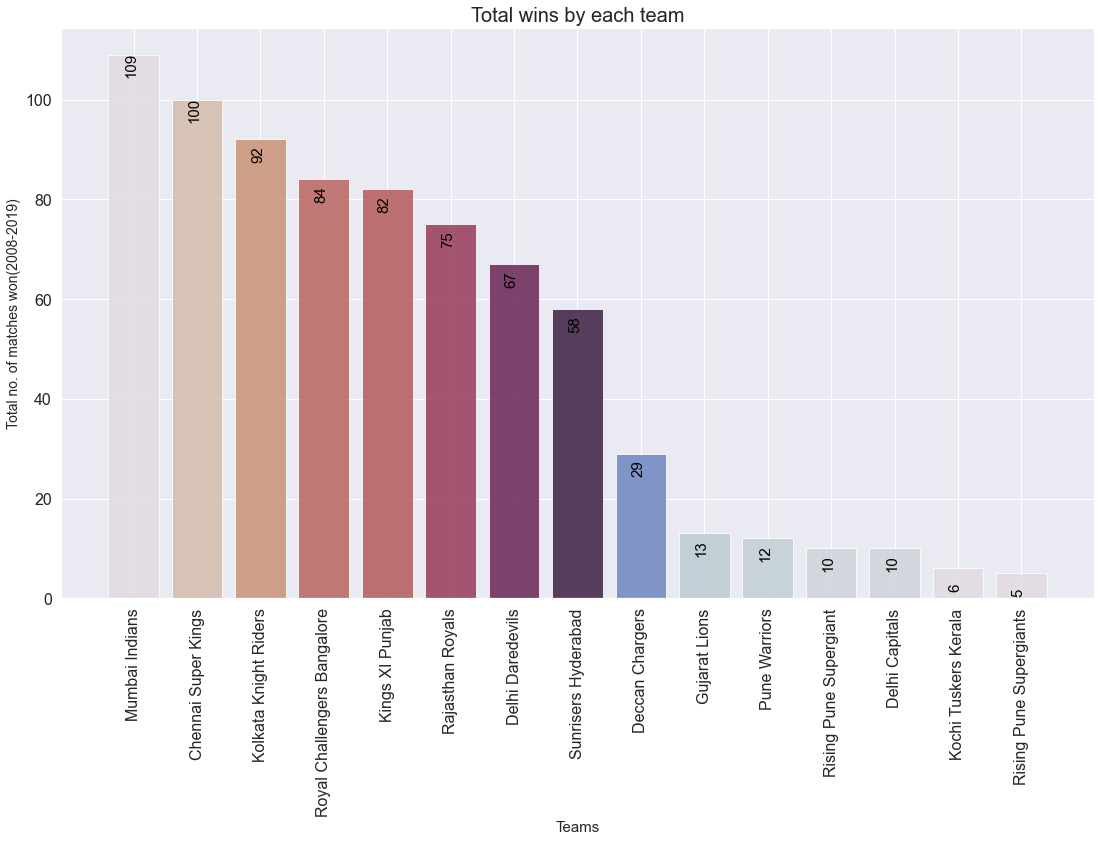

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
fig=plt.gcf()
my_cmap = plt.get_cmap("twilight")#'viridis', 'plasma', 'inferno', 'magma', 'cividis'
rescale = lambda y: (wins['winner'] - np.min(wins['winner'])) / (np.max(wins['winner']) - np.min(wins['winner']))
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'], color = my_cmap(rescale(wins['winner'])) ,alpha=0.8)
#         color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
#                '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
#                '#005DB7','#C23E25','#E82865']
        
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

<center><font size=4><b>Top 20 players with most MOM awards</b></font></center>

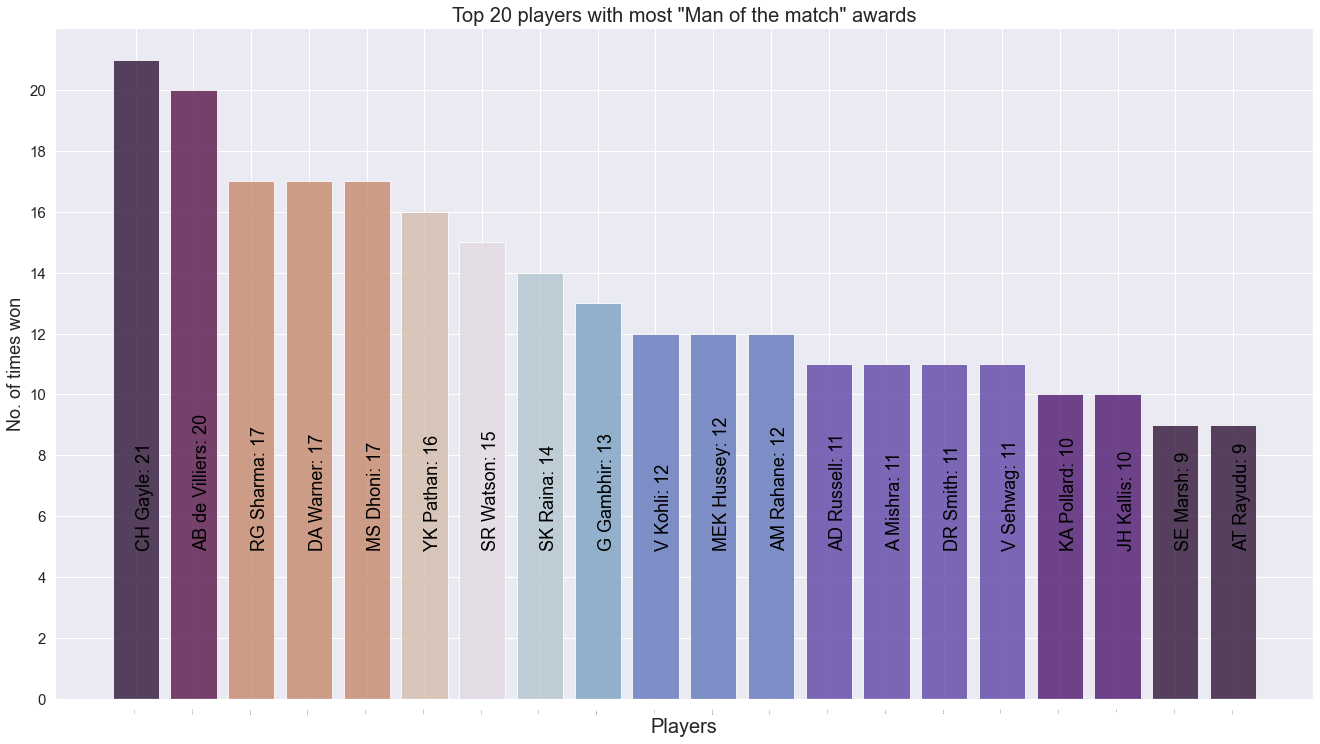

In [16]:
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
my_cmap = plt.get_cmap("twilight_shifted")#'viridis', 'plasma', 'inferno', 'magma', 'cividis', twilight
rescale = lambda y: (players['player_of_match'] - np.min(players['player_of_match'])) / (np.max(players['player_of_match']) - np.min(players['player_of_match']))
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color = my_cmap(rescale(players['player_of_match'])) ,alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,5,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()

<center><font size=4><b>Eliminating redundancy</b></font></center>
* There were two entries for the same city as 'Bangalore' and 'Bengaluru'

In [17]:
data.at[data['city']=='Bengaluru','city']='Bangalore'

<center><font size=4><b>Matches hosted in each city</b></font></center>
* Mumbai has hosted most no. of matches by far(101).
* As expected, top 8 cities are home grounds for the teams.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


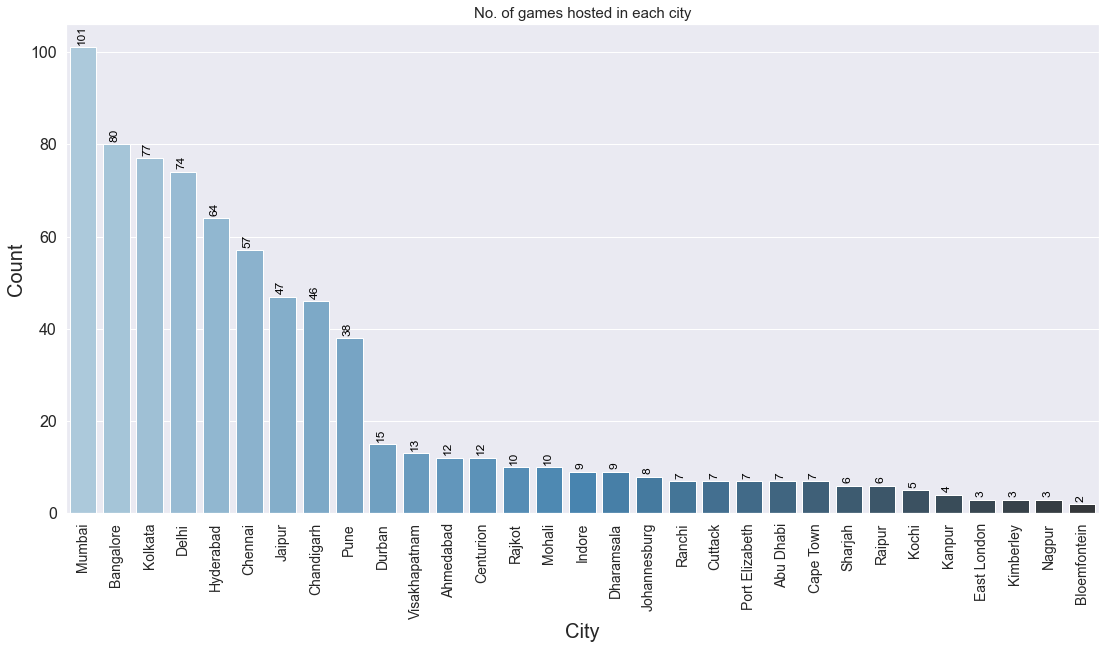

In [18]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(data['city'], order=data['city'].value_counts().index, palette='Blues_d')#pastel, Paired
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(data['city'].value_counts())
cities['name']=data['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i+1,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()


<center><font size=4><b>No. of matches hosted at each stadium</b></font></center>
* Eden Gardens(Kolkata) has hosted most no. of IPL matches(77)
* Wankhede and Chinnaswamy tied at no. 2 with 73 matches each.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


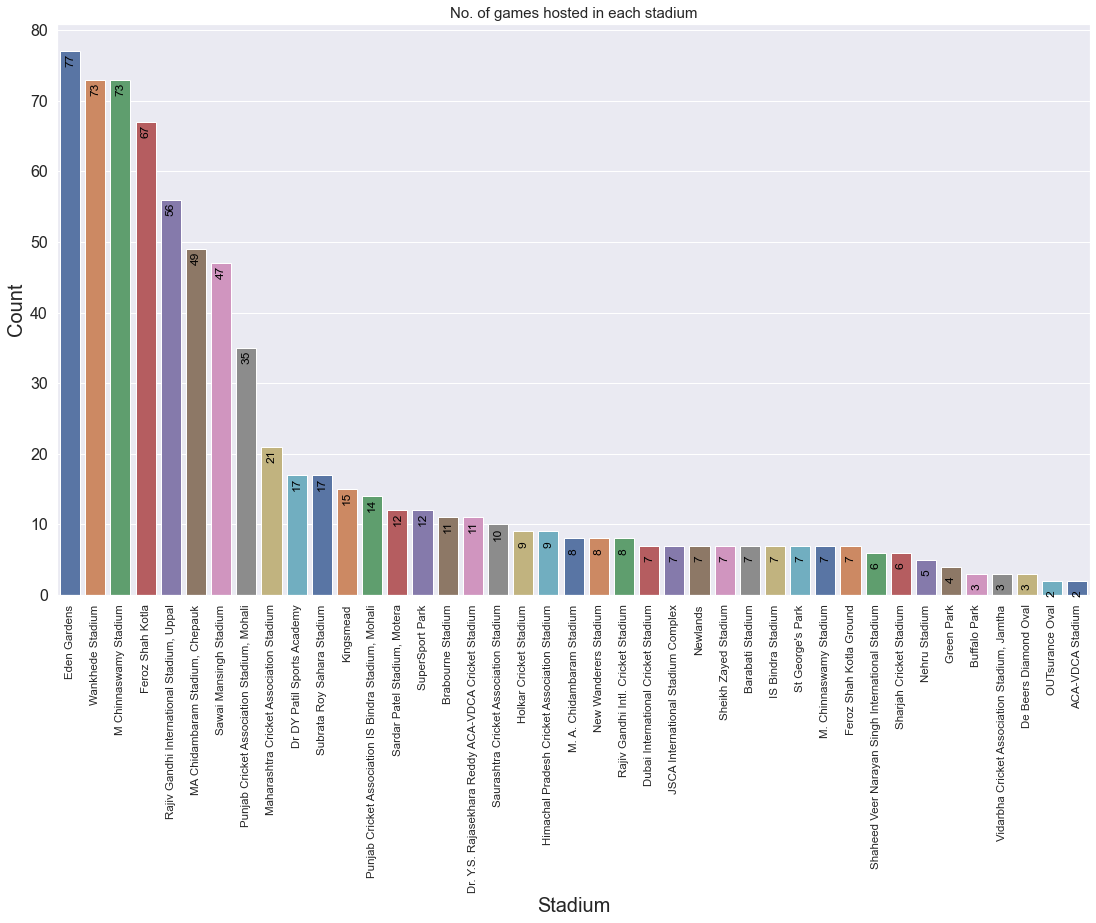

In [19]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(data['venue'], order=data['venue'].value_counts().index, palette='deep') #Blues_d
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('No. of games hosted in each stadium',fontsize=15)
count=0
venues=pd.DataFrame(data['venue'].value_counts())
venues['name']=data['venue'].value_counts().index
for i in venues['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()

In [20]:
# To filter out MI and CSK
micsk=data[np.logical_or(np.logical_and(data['team1']=='Mumbai Indians',data['team2']=='Chennai Super Kings'),np.logical_and(data['team2']=='Mumbai Indians',data['team1']=='Chennai Super Kings'))]

<center><font size=4><b>MI vs CSK head to head</b></font></center>

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


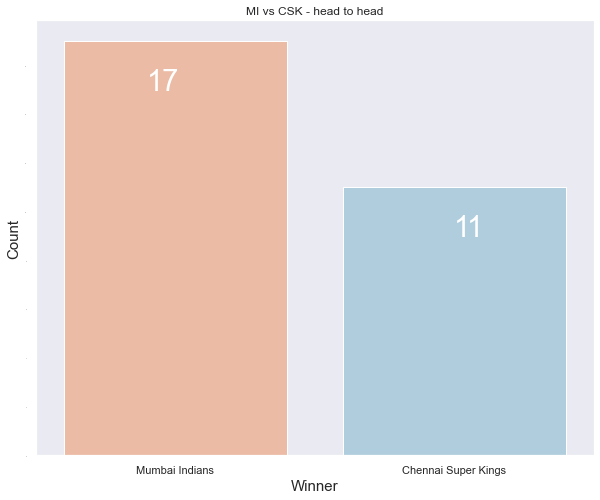

In [21]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(micsk['winner'],order=micsk['winner'].value_counts().index, palette = 'RdBu')
plt.text(-0.1,15,str(micsk['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(1,9,str(micsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('MI vs CSK - head to head')
plt.show()

# diverging_colors = sns.color_palette("RdBu", 10)
# sns.palplot(diverging_colors)

<center><font size=4><b>MI vs CSK - Best performers</b></font></center>

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


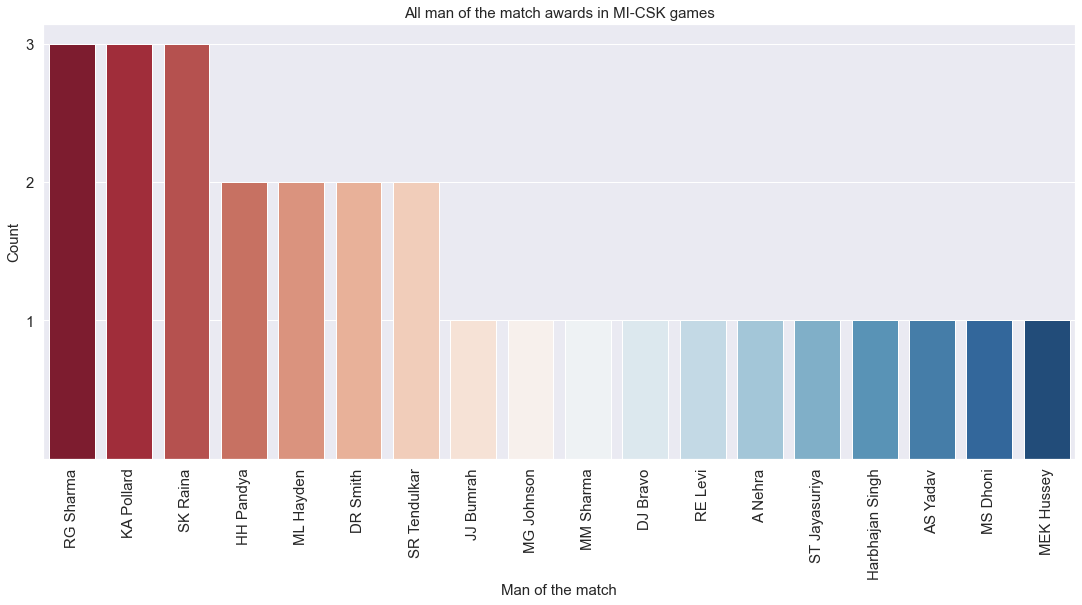

In [22]:

sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['player_of_match'], order=micsk['player_of_match'].value_counts().index, palette='RdBu')
plt.title('All man of the match awards in MI-CSK games',fontsize=15)
plt.yticks([1,2,3],[1,2,3],fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Man of the match',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


<center><font size=4><b>Toss decision statistics for all MIvCSK matches - Venue wise</b></font></center>

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


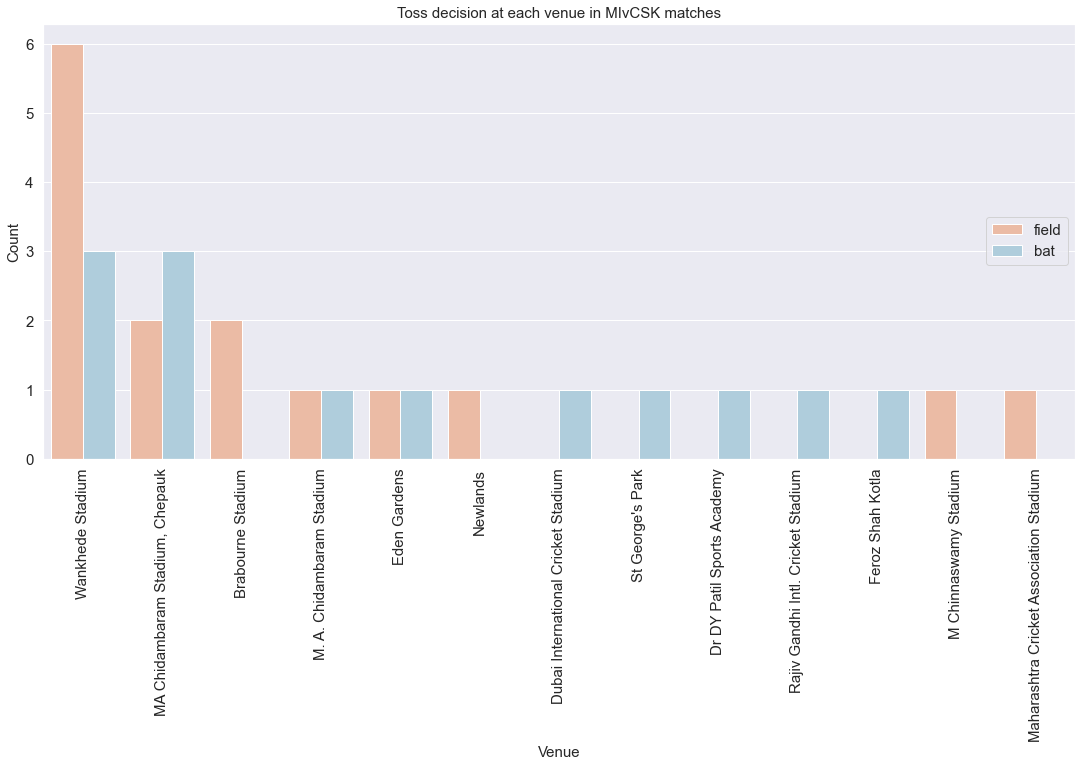

In [23]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['venue'], order=micsk['venue'].value_counts().index, palette='RdBu', hue=data['toss_decision']) #facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 2))
plt.title('Toss decision at each venue in MIvCSK matches',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=5,fontsize=15)
plt.show()


<center><font size=4><b>Decision upon winning the toss by both teams</b></font></center>
* MI tends to bat first(53% of the times)
* CSK tends to bowl first(62% of the times)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


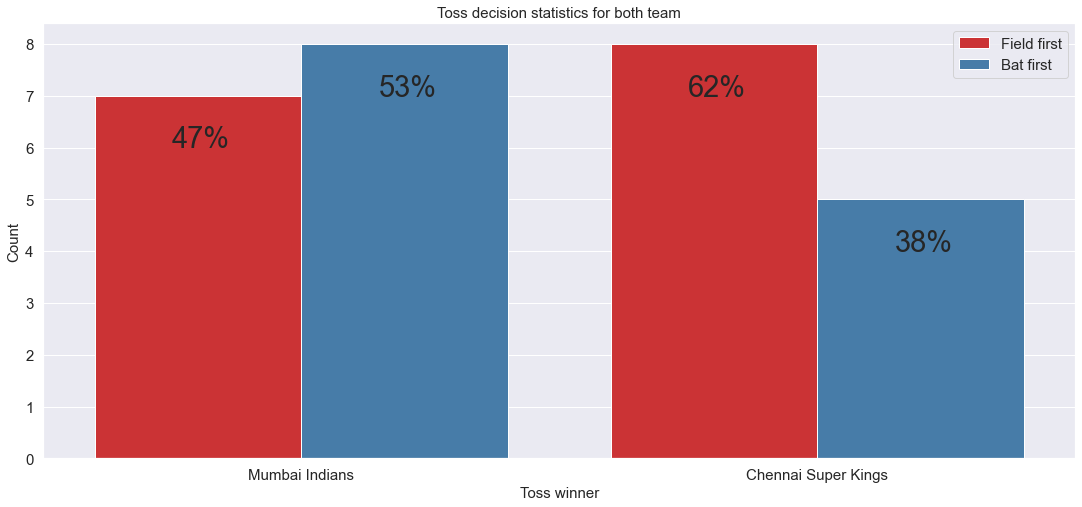

In [24]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['toss_winner'],order=micsk['toss_winner'].value_counts().index,palette='Set1',hue=data['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,7,str(int((8/15)*100))+'%',fontsize=29)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4,str(int((5/13)*100))+'%',fontsize=29)
plt.legend(['Field first','Bat first'],loc='best',fontsize=15)
plt.show()


<center><font size=4><b>Season wise match summary of matches won by runs</b></font></center>

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


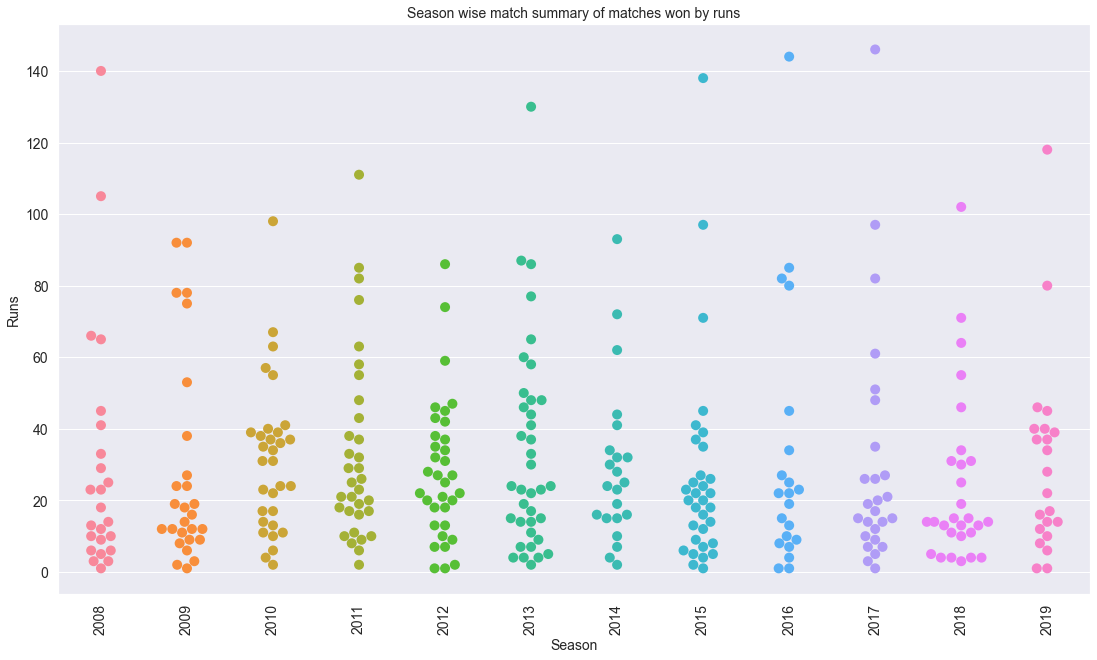

In [25]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(data['season'],data[data['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Season wise match summary of matches won by runs',fontsize=14)
plt.show()


<center><font size=4><b>Biggest win by runs each season</b></font></center>

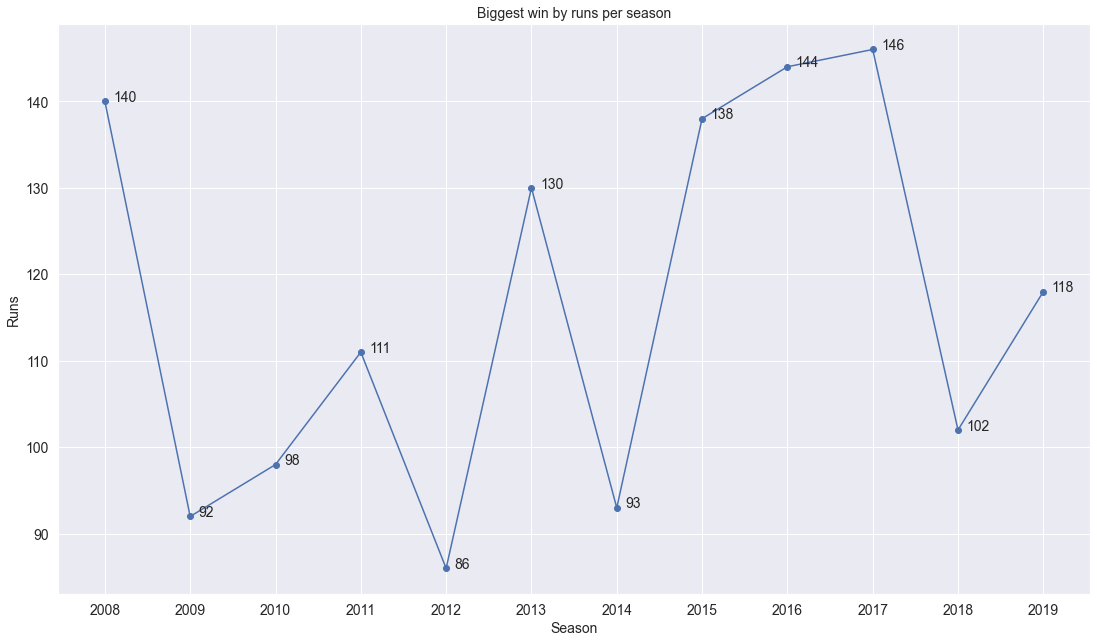

In [26]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(data[data['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(style='darkgrid')
# fig=plt.gcf()
# fig.set_size_inches(18.5,10.5)
# wins=pd.DataFrame(data['winner'].value_counts())
# wins['name']=wins.index
# plt.xticks(rotation=90,fontsize=16)
# plt.yticks(fontsize=16)
# plt.bar(wins['name'],
#         wins['winner'],  
#         color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
#                '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
#                '#005DB7','#C23E25','#E82865'],alpha=0.8)
        
# count=0
# for i in wins['winner']:
#     plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
#     count+=1
# plt.title('Total wins by each team',fontsize=20)
# plt.xlabel('Teams',fontsize=15)
# plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
# plt.show()